<a href="https://colab.research.google.com/github/Itsvi-ctor/Convolutional-Neural-Network/blob/main/preprocessed_canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Training with Canny images

In [130]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [131]:
from PIL import Image
import numpy as np
import os

# Folder containing images UNHEALTHY
folder_path_unhealthy = 'drive/My Drive/Train/Canny/CannyEdges_unhealthy_train'
# drive/My Drive/Train/Threshold/Threshold_unhealthy_train
# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy, file) for file in os.listdir(folder_path_unhealthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy = image_array_unhealthy/255.0
image_array_unhealthy.shape

(50, 600, 1200)

In [134]:
# Folder containing images HEALTHY
folder_path_healthy = 'drive/My Drive/Train/Canny/CannyEdges_healthy_train'

# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_healthy, file) for file in os.listdir(folder_path_healthy) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_healthy = image_array_healthy/255.0
image_array_healthy.shape

(50, 600, 1200)

In [135]:
# Folder containing images UNHEALTHY TEST
folder_path_unhealthy_test = 'drive/My Drive/Test/Canny/CannyEdges_unhealthy_test'
# G:\My Drive\Test\Threshold\Threshold_unhealthy_test
# List all image files in the folder
image_files_unhealthy = [os.path.join(folder_path_unhealthy_test, file) for file in os.listdir(folder_path_unhealthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_unhealthy_test = np.array([np.array(Image.open(file)) for file in image_files_unhealthy])
image_array_unhealthy_test.shape

(18, 600, 1200)

In [136]:
# Folder containing images HEALTHY TEST
folder_path_healthy_test = 'drive/My Drive/Test/Canny/CannyEdges_healthy_test'

# Threshold\Threshold_unhealthy_test

# List all image files in the folder
image_files_healthy_test = [os.path.join(folder_path_healthy_test, file) for file in os.listdir(folder_path_healthy_test) if file.endswith(('png', 'jpg', 'jpeg'))]

# Load images into a NumPy array
image_array_healthy_test = np.array([np.array(Image.open(file)) for file in image_files_healthy_test])
image_array_healthy_test.shape

(18, 600, 1200)

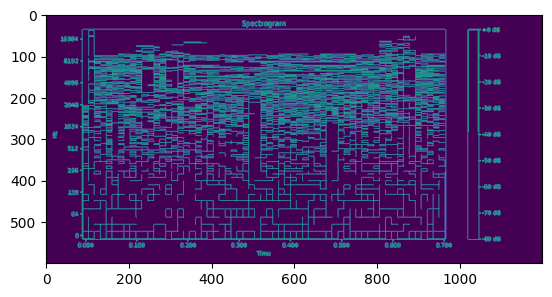

In [137]:
idx = random.randint(0, len(image_array_unhealthy_test))
plt.imshow(image_array_unhealthy_test[idx, :])
plt.show()

In [142]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 1)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [143]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (600, 1200, 1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Assuming you have a model created
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(600, 1200, 1)))
# Add other layers...

# Output layer for binary classification
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # One unit for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [145]:
# Assuming image_array_healthy and image_array_unhealthy are correctly prepared and loaded

# Convert to float32 and reshape the input data
image_array_healthy = np.asarray(image_array_healthy).astype('float32').reshape((-1, 600, 1200))
image_array_unhealthy = np.asarray(image_array_unhealthy).astype('float32').reshape((-1, 600, 1200))

# Assuming labels are encoded (0 for unhealthy, 1 for healthy)
# Ensure labels are shaped accordingly
labels_healthy = np.ones((len(image_array_healthy), 1))  # Assuming healthy is labeled as 1
labels_unhealthy = np.zeros((len(image_array_unhealthy), 1))  # Assuming unhealthy is labeled as 0

# Combine labels for both healthy and unhealthy data
labels_combined = np.vstack((labels_unhealthy, labels_healthy))

# Train the model
model.fit(np.vstack((image_array_unhealthy, image_array_healthy)), labels_combined, epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(np.vstack((image_array_unhealthy, image_array_healthy)), labels_combined, verbose=2)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/10
2/2 [==============================] - 14s 4s/step - loss: 0.8238 - accuracy: 0.7000
Epoch 2/10
2/2 [==============================] - 11s 4s/step - loss: 32.2616 - accuracy: 0.6800
Epoch 3/10
2/2 [==============================] - 11s 4s/step - loss: 26.5736 - accuracy: 0.6500
Epoch 4/10
2/2 [==============================] - 11s 4s/step - loss: 1.5473 - accuracy: 0.9700
Epoch 5/10
2/2 [==============================] - 11s 4s/step - loss: 13.1743 - accuracy: 0.8100
Epoch 6/10
2/2 [==============================] - 11s 4s/step - loss: 2.4694 - accuracy: 0.9400
Epoch 7/10
2/2 [==============================] - 11s 4s/step - loss: 6.0922e-21 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 11s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 11s 4s/step - loss: 4.7280e-36 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 11s 4s/step - loss: 5.0731e-12 - accuracy: 1.0000


4/4 - 4s - loss: 0.2260 - accuracy: 0.9900 - 4s/epoch - 927ms/step
Loss: 0.22597335278987885
Accuracy: 0.9900000095367432


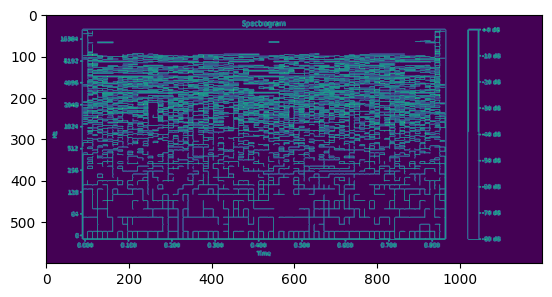

1/1 [==============================] - 0s 131ms/step
Our model says it is : healthy


In [146]:
idx2 = random.randint(0, len(image_array_healthy_test))
plt.imshow(image_array_unhealthy_test[idx2, :])
plt.show()

y_pred = model.predict(image_array_unhealthy_test[idx2, :].reshape(1, 600, 1200))
# y_pred = y_pred > 0.5

if(y_pred > 0.5 ):
    pred = 'healthy'
else:
    pred = 'unhealthy'

print("Our model says it is :", pred)